[*********************100%***********************]  1 of 1 completed
Up trend
buy:2018-03-09 00:00:00 2786.570068359375
3 days 00:00:00
4 days 00:00:00
5 days 00:00:00
6 days 00:00:00
7 days 00:00:00
10 days 00:00:00
11 days 00:00:00
12 days 00:00:00
13 days 00:00:00
損切り:2018-03-22 00:00:00 2643.68994140625
Up trend
buy:2018-05-10 00:00:00 2723.070068359375
1 days 00:00:00
4 days 00:00:00
5 days 00:00:00
6 days 00:00:00
7 days 00:00:00
8 days 00:00:00
11 days 00:00:00
12 days 00:00:00
13 days 00:00:00
14 days 00:00:00
15 days 00:00:00
19 days 00:00:00
20 days 00:00:00
21 days 00:00:00
22 days 00:00:00
25 days 00:00:00
26 days 00:00:00
27 days 00:00:00
28 days 00:00:00
29 days 00:00:00
32 days 00:00:00
33 days 00:00:00
34 days 00:00:00
35 days 00:00:00
36 days 00:00:00
39 days 00:00:00
40 days 00:00:00
41 days 00:00:00
42 days 00:00:00
43 days 00:00:00
46 days 00:00:00
47 days 00:00:00
48 days 00:00:00
49 days 00:00:00
50 days 00:00:00
53 days 00:00:00
54 days 00:00:00
56 days 00:00:00


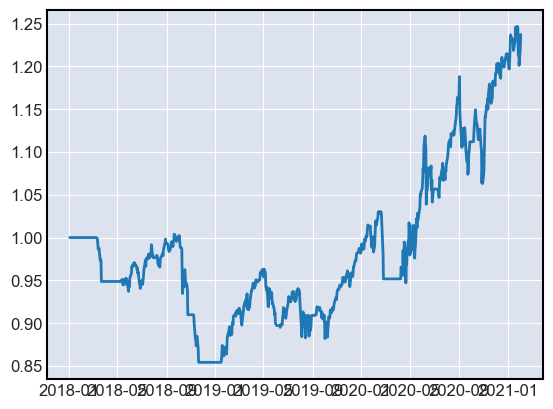

Axes(0.18,0.38;0.72x0.5)


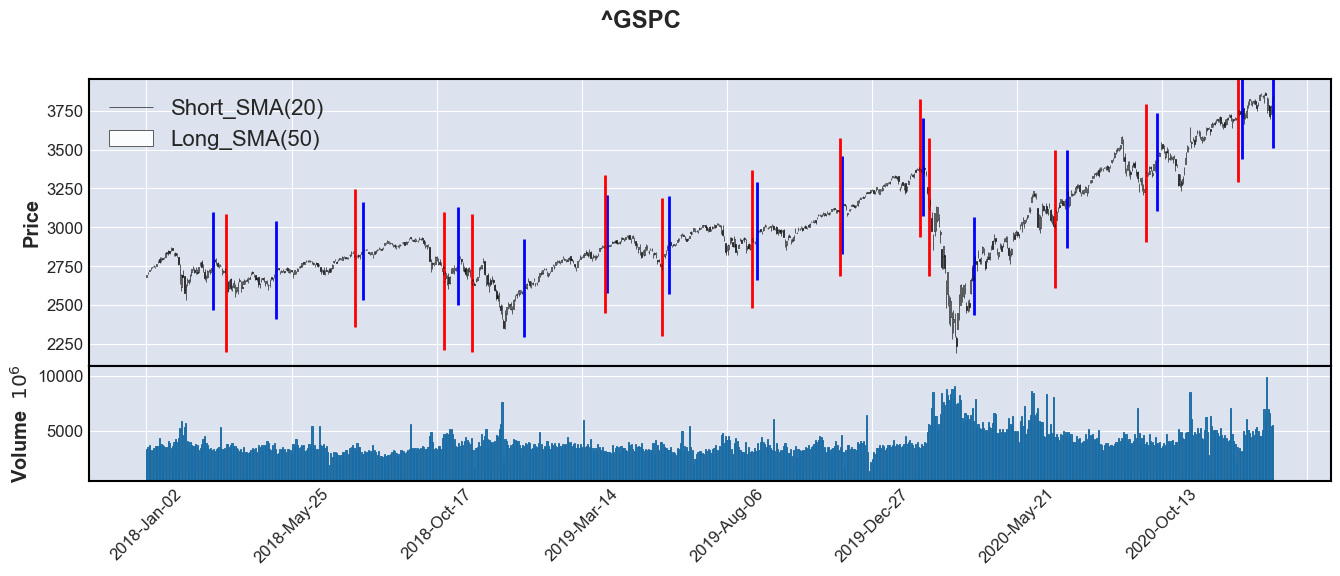

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf

"""
方針：20日高値で買い、80日で退出のプログラム
"""

start = '2018-01-01'
end = dt.datetime.now()
stock_code = '^GSPC'
df = yf.download(stock_code, start, end, interval='1d')

# 何日間で最大最小の値を保持
shortTerm = 10
longTerm = 20

# 損切り率と利確の日数
stopLoss = 0.95
rikaku_day = 80

# judge U trend or Down trend by DC
buy_position = False # 1 means entered and 0 means not already entered
sell_position = False

# 買った（売った）後に経過した日数、損切りラインを保持
buy_dates = 0
sell_dates = 0
buy_stopLine = 0
sell_stopLine = 0
counter = 1
percentChange = []

# 資産、購入したときの資産
assets = [1]
buy_asset = 1

#　買った日、売った日
buy_days = []
sell_days = []

# chek the highest price in the past {term} times
df['Highest'+str(shortTerm)] = df.iloc[:, 4].rolling(window=shortTerm).max()
# chek the highest price in the past {term} times
df['Lowest'+str(shortTerm)] = df.iloc[:, 4].rolling(window=shortTerm).min()

# chek the highest price in the past {term} times
df['Highest'+str(longTerm)] = df.iloc[:, 4].rolling(window=longTerm).max()
# chek the highest price in the past {term} times
df['Lowest'+str(longTerm)] = df.iloc[:, 4].rolling(window=longTerm).min()


"""
メインループ
基本戦略
過去longTerm間の調整済み終値の最高値をその日の調整済み終値が更新したら購入or空売り
損切り率は5%。80日後に利確する。
最終日にまだ保持していた場合捌く
"""
# for i in range(1, len(df)):
for i in range(1,len(df)):
        
    shortHighest = df['Highest'+str(shortTerm)][i-1]
    shortLowest = df['Lowest'+str(shortTerm)][i-1]
    longHighest = df['Highest'+str(longTerm)][i-1]
    longLowest = df['Lowest'+str(longTerm)][i-1] 
    close = df['Adj Close'][i]
    sell_day = pd.to_datetime(df.index[i])
    
    if buy_position == False:
        assets.append(assets[i-1])
    else:
        print(sell_day - buy_day)
        assets.append(buy_asset*(close / buy_price))
        
    # avoid NaN data 
    # 買いトレンド
    if (np.isnan(longHighest)) == False:
        if (close > longHighest and buy_position == False):
            print('Up trend')
            buy_position = True
            buy_price = close
            buy_stopLine = close * stopLoss
            buy_asset = assets[i]
            buy_day = pd.to_datetime(df.index[i])
            buy_days.append(df.index[i])
            print('buy:'+str(df.index[i]),close)

    # 損切り
    if buy_position == True and close < buy_stopLine:
        buy_position = False
        percent = (close/buy_price - 1) * 100
        percentChange.append(percent)
        sell_days.append(df.index[i])
        print('損切り:'+str(df.index[i]),close)

    # 利確
    if  buy_position == True and (sell_day - buy_day).days > 79:
        buy_position = False
        percent = (close/buy_price - 1) * 100
        percentChange.append(percent)
        sell_days.append(df.index[i])
#         buy_dates = 0
        print('利確:'+str(df.index[i]),close)
#         print('Date:'+str(i),'Secure Profit Buy at the price {}'.format(close))
        
    # 損切りラインの更新
    # if buy_position = 

    #  最終日にまだ持ってたら利確する
    if (counter == df['Adj Close'].count() - 1):
        if buy_position == True:
            buy_position = False
            percent = (close / buy_price - 1) * 100
            percentChange.append(percent)
            buy_days.append(df.index[i])
#             buy_dates = 0
            print('最終日売:'+str(df.index[i]),close)
#             print('Date:'+str(i),'Last Day Buy at the price {}'.format(close))

#     # 買ってからの日数を更新する
#     if buy_position == True:
#         buy_dates += 1
    counter += 1



print(percentChange)

# statistic
gains = 0
numGains = 0
losses = 0
numLosses = 0
total_return = 1

for i in percentChange:
    if i > 0:
        numGains += 1
        gains += i
    else:
        numLosses += 1
        losses += i
    total_return = total_return * ((i / 100) + 1)

total_return = round((total_return - 1)*100, 2)

if numGains > 0:
    average_gain = gains / numGains
    max_return = max(percentChange)
else:
    average_gain = 0
    max_return = 'unknown'
    
if numLosses > 0:
    average_loss = losses / numLosses
    max_loss = min(percentChange)
    risk_reward_retio = - average_gain / average_loss
else:
    average_loss = 0
    max_loss = 'unknown'
    risk_reward_retio = 'inf'
    
if numGains > 0 or numLosses > 0:
    batting_ratio = numGains / (numGains + numLosses)
else:
    batting_ratio = 0
    
print('The period is from {} up to {}'.format(df.index[0], df.index[-1]))
print('Trades: {}'.format(numGains+numLosses))
print('Total return: {}%'.format(total_return))
print('Average Gain: {}'.format(average_gain))
print('Average Loss: {}'.format(average_loss))
print('Max Return: {}'.format(max_return))
print('Max Loss: {}'.format(max_loss))
print('Gain/Loss Ratio: {}'.format(risk_reward_retio))
print('Batting Average: {}'.format(batting_ratio))

# 資産の計算とドローダウンの計算
assets = np.array(assets)
max_asset = 1
max_drawdown = 0
for i in range(len(assets)):
    max_asset = max(max_asset,assets[i])
    now_drawdown = 1 - (assets[i]/max_asset)
    if now_drawdown < 0:
        continue
    max_drawdown = max(max_drawdown, now_drawdown)  
print(max_drawdown)
plt.plot(df.index,assets)
plt.show()

buy_signals = []
sell_signals = []

for i in df.index:
    if i in buy_days:
        buy_signals.append(df['Adj Close'][i])
    else:
        buy_signals.append(np.nan)
    if i in sell_days:
        sell_signals.append(df['Adj Close'][i])
    else:
        sell_signals.append(np.nan)
adp = [
    mpf.make_addplot(buy_signals,type='scatter',color='b',marker='|',markersize=5000),
    mpf.make_addplot(sell_signals,type='scatter',color='r',marker='|',markersize=10000)
]
fig, ax = mpf.plot(df,type='candle',figratio=(45,15),
                  addplot=adp, volume=True, title=str(stock_code), returnfig=True)
legend = ['Short_SMA(20)','Long_SMA(50)']
ax[0].legend(legend,fontsize=16)
print(ax[0])